http://ai.stanford.edu/~jkrause/cars/car_dataset.html

The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

In [30]:
!pip install -Uqq fastbook
import fastbook # Install and import fastbook which the necessary helper/wrapper functions to use.
fastbook.setup_book()

In [31]:
import fastai
print(fastai.__version__)
#!pip3 install git+https://github.com/fastai/fastai.git

2.5.3


In [32]:
from fastai.vision.all import * # Import fastai
from fastbook import *
from fastai import *
import tarfile

Download training data - http://imagenet.stanford.edu/internal/car196/cars_train.tgz

In [33]:
cars_training_tgz_path = Path('cars_train.tgz')
if not os.path.exists(cars_training_tgz_path):
  download_url('http://ai.stanford.edu/~jkrause/car196/cars_train.tgz', dest=cars_training_tgz_path)

In [34]:
cars_training_path = Path('./cars_training') # create a path object and pass in the name of the directory ("cars_training") where you will be downloading the dataset.

In [35]:
#untar the downloaded training files.
if os.path.exists(cars_training_path):
  shutil.rmtree(cars_training_path)
tar_file = tarfile.open(cars_training_tgz_path)
tar_file.extractall(cars_training_path) # specify which folder to extract to
tar_file.close()

See the training data that you downloaded.

In [36]:
cars_training_path = Path('./cars_training/cars_train') 
print(cars_training_path)

cars_training/cars_train


In [37]:
#print the total number of downloaded cars training files.
print(cars_training_path.ls()) # see what you downloaded.
print(f'total number of training images = {len(cars_training_path.ls())}')

[Path('cars_training/cars_train/00451.jpg'), Path('cars_training/cars_train/03498.jpg'), Path('cars_training/cars_train/02269.jpg'), Path('cars_training/cars_train/01447.jpg'), Path('cars_training/cars_train/01060.jpg'), Path('cars_training/cars_train/00632.jpg'), Path('cars_training/cars_train/00851.jpg'), Path('cars_training/cars_train/02564.jpg'), Path('cars_training/cars_train/04083.jpg'), Path('cars_training/cars_train/03763.jpg'), Path('cars_training/cars_train/06130.jpg'), Path('cars_training/cars_train/01821.jpg'), Path('cars_training/cars_train/06102.jpg'), Path('cars_training/cars_train/03465.jpg'), Path('cars_training/cars_train/02261.jpg'), Path('cars_training/cars_train/00752.jpg'), Path('cars_training/cars_train/00025.jpg'), Path('cars_training/cars_train/05211.jpg'), Path('cars_training/cars_train/00166.jpg'), Path('cars_training/cars_train/05688.jpg'), Path('cars_training/cars_train/06249.jpg'), Path('cars_training/cars_train/03602.jpg'), Path('cars_training/cars_train/

Download testing data - http://imagenet.stanford.edu/internal/car196/cars_test.tgz

In [38]:
#untarred_cars_testing_path=untar_data('http://imagenet.stanford.edu/internal/car196/cars_test.tgz', dest=cars_testing_path) # download the car dataset from standford.edu to the destination path
cars_testing_tgz_path = Path('cars_test.tgz')
if not os.path.exists(cars_testing_tgz_path):
  download_url('http://ai.stanford.edu/~jkrause/car196/cars_test.tgz', dest=cars_testing_tgz_path)


In [39]:
#untar the downloaded testing files.
cars_testing_path = Path('./cars_testing') # create a path object and pass in the name of the directory ("cars_testing") where you will be downloading the dataset.
if os.path.exists(cars_testing_path):
  shutil.rmtree(cars_testing_path)
tar_file = tarfile.open(cars_testing_tgz_path)
tar_file.extractall(cars_testing_path) # specify which folder to extract to
tar_file.close()

See the testing data thar you downloaded.

In [40]:
#print the total number of downloaded cars testing files.
cars_testing_path = Path('./cars_testing/cars_test') 
print(cars_testing_path.ls()) # see what you downloaded.
print(f'total number of testing images = {len(cars_testing_path.ls())}')

[Path('cars_testing/cars_test/00451.jpg'), Path('cars_testing/cars_test/03498.jpg'), Path('cars_testing/cars_test/02269.jpg'), Path('cars_testing/cars_test/01447.jpg'), Path('cars_testing/cars_test/01060.jpg'), Path('cars_testing/cars_test/00632.jpg'), Path('cars_testing/cars_test/00851.jpg'), Path('cars_testing/cars_test/02564.jpg'), Path('cars_testing/cars_test/04083.jpg'), Path('cars_testing/cars_test/03763.jpg'), Path('cars_testing/cars_test/06130.jpg'), Path('cars_testing/cars_test/01821.jpg'), Path('cars_testing/cars_test/06102.jpg'), Path('cars_testing/cars_test/03465.jpg'), Path('cars_testing/cars_test/02261.jpg'), Path('cars_testing/cars_test/00752.jpg'), Path('cars_testing/cars_test/00025.jpg'), Path('cars_testing/cars_test/05211.jpg'), Path('cars_testing/cars_test/00166.jpg'), Path('cars_testing/cars_test/05688.jpg'), Path('cars_testing/cars_test/06249.jpg'), Path('cars_testing/cars_test/03602.jpg'), Path('cars_testing/cars_test/07689.jpg'), Path('cars_testing/cars_test/0529

A devkit, including class labels for training images and bounding boxes for all images, can be downloaded here - http://ai.stanford.edu/~jkrause/cars/car_devkit.tgz

In [41]:
# download annotations for training.
cars_annotation_tgz_path = Path('cars_devkit.tgz')
if not os.path.exists(cars_annotation_tgz_path):
  download_url('http://ai.stanford.edu/~jkrause/cars/car_devkit.tgz', dest=cars_annotation_tgz_path)

In [42]:
#untar the downloaded annotations files.
cars_annotations_path = Path('./cars_annotations')
if os.path.exists(cars_annotations_path):
  shutil.rmtree(cars_annotations_path)
tar_file = tarfile.open(cars_annotation_tgz_path)
tar_file.extractall(cars_annotations_path) # specify which folder to extract to
tar_file.close()


In [43]:
#print the total number of annotation files.
print(cars_annotations_path.ls()) # see what you downloaded.
print(f'total number of testing images = {len(cars_annotations_path.ls())}')

[Path('cars_annotations/devkit')]
total number of testing images = 1


Download test annotations with labels -  http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat

In [44]:
# download annotations for testing to the specified destination. cars_annotations/car_devkit/
if not os.path.exists('cars_annotations/devkit/cars_test_annos_withlabels.mat'):
  download_url('http://ai.stanford.edu/~jkrause/car196/cars_test_annos_withlabels.mat', 
               'cars_annotations/devkit/cars_test_annos_withlabels.mat')


Save the annotations to a variable.

In [45]:
cars_test_annos = 'cars_annotations/devkit/cars_test_annos_withlabels.mat'
car_train_annos = 'cars_annotations/devkit/cars_train_annos.mat'
car_meta_annos = 'cars_annotations/devkit/cars_meta.mat'

Install console progress bar to observe the progression of preparing training and testing data based upon the annotations.

In [46]:
!pip install console_progressbar

Import the necessary packages

In [47]:
import tarfile
import numpy as np
import scipy.io
import os
import cv2 as cv
import shutil
import random
import re
from console_progressbar import ProgressBar

Load the class name into a list.
Sanitize the class names by replacing whitespaces with _ which will be used to create sub directories under test and train output.
Example: "Ram C/V Cargo Van Minivan 2012" -> Ram_C_V_Cargo_Van_Minivan_2012

In [48]:
print(cars_annotations_path.ls())

[Path('cars_annotations/devkit')]


In [49]:
cars_name_list = []
print(f"Processing annotations metadata {car_meta_annos}")
cars_meta = scipy.io.loadmat(car_meta_annos)
class_names = cars_meta['class_names']  # shape=(1, 196)
class_names = np.transpose(class_names)
print('class_names.shape: ' + str(class_names.shape))
print(f'type of class_names = {type(class_names)}')
print(f'size of class_names = {class_names.size}')
for index in range(class_names.size):
  # Replace white space and / with _. Example: "Ram C/V Cargo Van Minivan 2012" -> Ram_C_V_Cargo_Van_Minivan_2012
  cars_name_list.append(re.sub(r"(/|\s+)", r'_', class_names[index][0][0]))

print('length of cars_name_list = {}, Sample class_name: [{}]'.format(len(cars_name_list), cars_name_list[3]))

Processing annotations metadata cars_annotations/devkit/cars_meta.mat
class_names.shape: (196, 1)
type of class_names = <class 'numpy.ndarray'>
size of class_names = 196
length of cars_name_list = 196, Sample class_name: [Acura_TL_Type-S_2008]


For each of the class name, create a sub directory in cars_testing_output directory and cars_training_output directory.

In [50]:
cars_training_output_path = Path('./cars_training_output')
# Delete the training output dir.
if os.path.exists(cars_training_output_path):
  shutil.rmtree(cars_training_output_path)
if not cars_training_output_path.exists():
    cars_training_output_path.mkdir()



Process the train data and classify them into the cars_testing_output and cars_training_output directory with the correct class name as the sub directory name.

In [51]:
def create_destination_directory_with_names(dest, name_list):
  #Create sub directories with the name of the car names in the destination.
  print("creating sub directories in {} with names found in {}.".format(
      dest, name_list))
  for o in name_list:
    final_dest = (dest/o)
    final_dest.mkdir(exist_ok=True)


create_destination_directory_with_names(cars_training_output_path, cars_name_list)


creating sub directories in cars_training_output with names found in ['AM_General_Hummer_SUV_2000', 'Acura_RL_Sedan_2012', 'Acura_TL_Sedan_2012', 'Acura_TL_Type-S_2008', 'Acura_TSX_Sedan_2012', 'Acura_Integra_Type_R_2001', 'Acura_ZDX_Hatchback_2012', 'Aston_Martin_V8_Vantage_Convertible_2012', 'Aston_Martin_V8_Vantage_Coupe_2012', 'Aston_Martin_Virage_Convertible_2012', 'Aston_Martin_Virage_Coupe_2012', 'Audi_RS_4_Convertible_2008', 'Audi_A5_Coupe_2012', 'Audi_TTS_Coupe_2012', 'Audi_R8_Coupe_2012', 'Audi_V8_Sedan_1994', 'Audi_100_Sedan_1994', 'Audi_100_Wagon_1994', 'Audi_TT_Hatchback_2011', 'Audi_S6_Sedan_2011', 'Audi_S5_Convertible_2012', 'Audi_S5_Coupe_2012', 'Audi_S4_Sedan_2012', 'Audi_S4_Sedan_2007', 'Audi_TT_RS_Coupe_2012', 'BMW_ActiveHybrid_5_Sedan_2012', 'BMW_1_Series_Convertible_2012', 'BMW_1_Series_Coupe_2012', 'BMW_3_Series_Sedan_2012', 'BMW_3_Series_Wagon_2012', 'BMW_6_Series_Convertible_2007', 'BMW_X5_SUV_2007', 'BMW_X6_SUV_2012', 'BMW_M3_Coupe_2012', 'BMW_M5_Sedan_2010', '

In [52]:
img_width, img_height = 224, 224


def save_train_data(fnames, labels, bboxes):
    src_folder = (cars_training_path)
    dst_folder = cars_training_output_path
    num_samples = len(fnames)
    pb = ProgressBar(total=100, prefix='Save train data', suffix='', decimals=3, length=50, fill='=')
    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]

        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print("{} -> {}".format(fname, label))
        pb.print_progress_bar((i + 1) * 100 / num_samples)
        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)

        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)
        

training_fnames = []
training_class_ids = []
training_bboxes = []
training_labels = []
training_labels_count=0

def process_train_data():
    print(f"Processing train data {car_train_annos}.")
    cars_annos = scipy.io.loadmat(car_train_annos)
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        #labels.append('%04d' % (class_id,))
        #print(f'class_id = {class_id}')
        training_labels.append(cars_name_list[class_id-1])
        fname = annotation[0][5][0]
        training_bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        training_class_ids.append(class_id)
        training_fnames.append(fname)

    save_train_data(training_fnames, training_labels, training_bboxes)

if not len(training_labels):
  process_train_data()
training_labels_count=len(np.unique(training_labels))

Processing train data cars_annotations/devkit/cars_train_annos.mat.
Save train data |==================================================| 100.000% 


In [53]:
print("training_class_ids = {}.".format(np.unique(training_class_ids)))
print("training_labels = {}.".format(np.unique(training_labels)))
print("training_fnames = {}.".format(training_fnames))
print('The number of different cars = {}'.format(training_labels_count))

training_class_ids = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196].
training_labels = ['AM_General_Hummer_SUV_2000' 'Acura_Integra_Type_R_2001' 'Acura_RL_Sedan_2012' 'Acura_TL_Sedan_2012' 'Acura_TL_Type-S_2008' 'Acura_TSX_Sedan_2012' 'Acura_ZDX_Hatchback_20

In [54]:
import torchvision
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *
import numpy as np
import pandas as pd
import scipy.io as sio

Data Augmentation

In [55]:
dls = ImageDataLoaders.from_folder(cars_training_output_path, valid_pct=0.2)
dls.valid_ds.items[:3]


[Path('cars_training_output/Volkswagen_Beetle_Hatchback_2012/07073.jpg'),
 Path('cars_training_output/FIAT_500_Abarth_2012/00437.jpg'),
 Path('cars_training_output/Fisker_Karma_Sedan_2012/05486.jpg')]

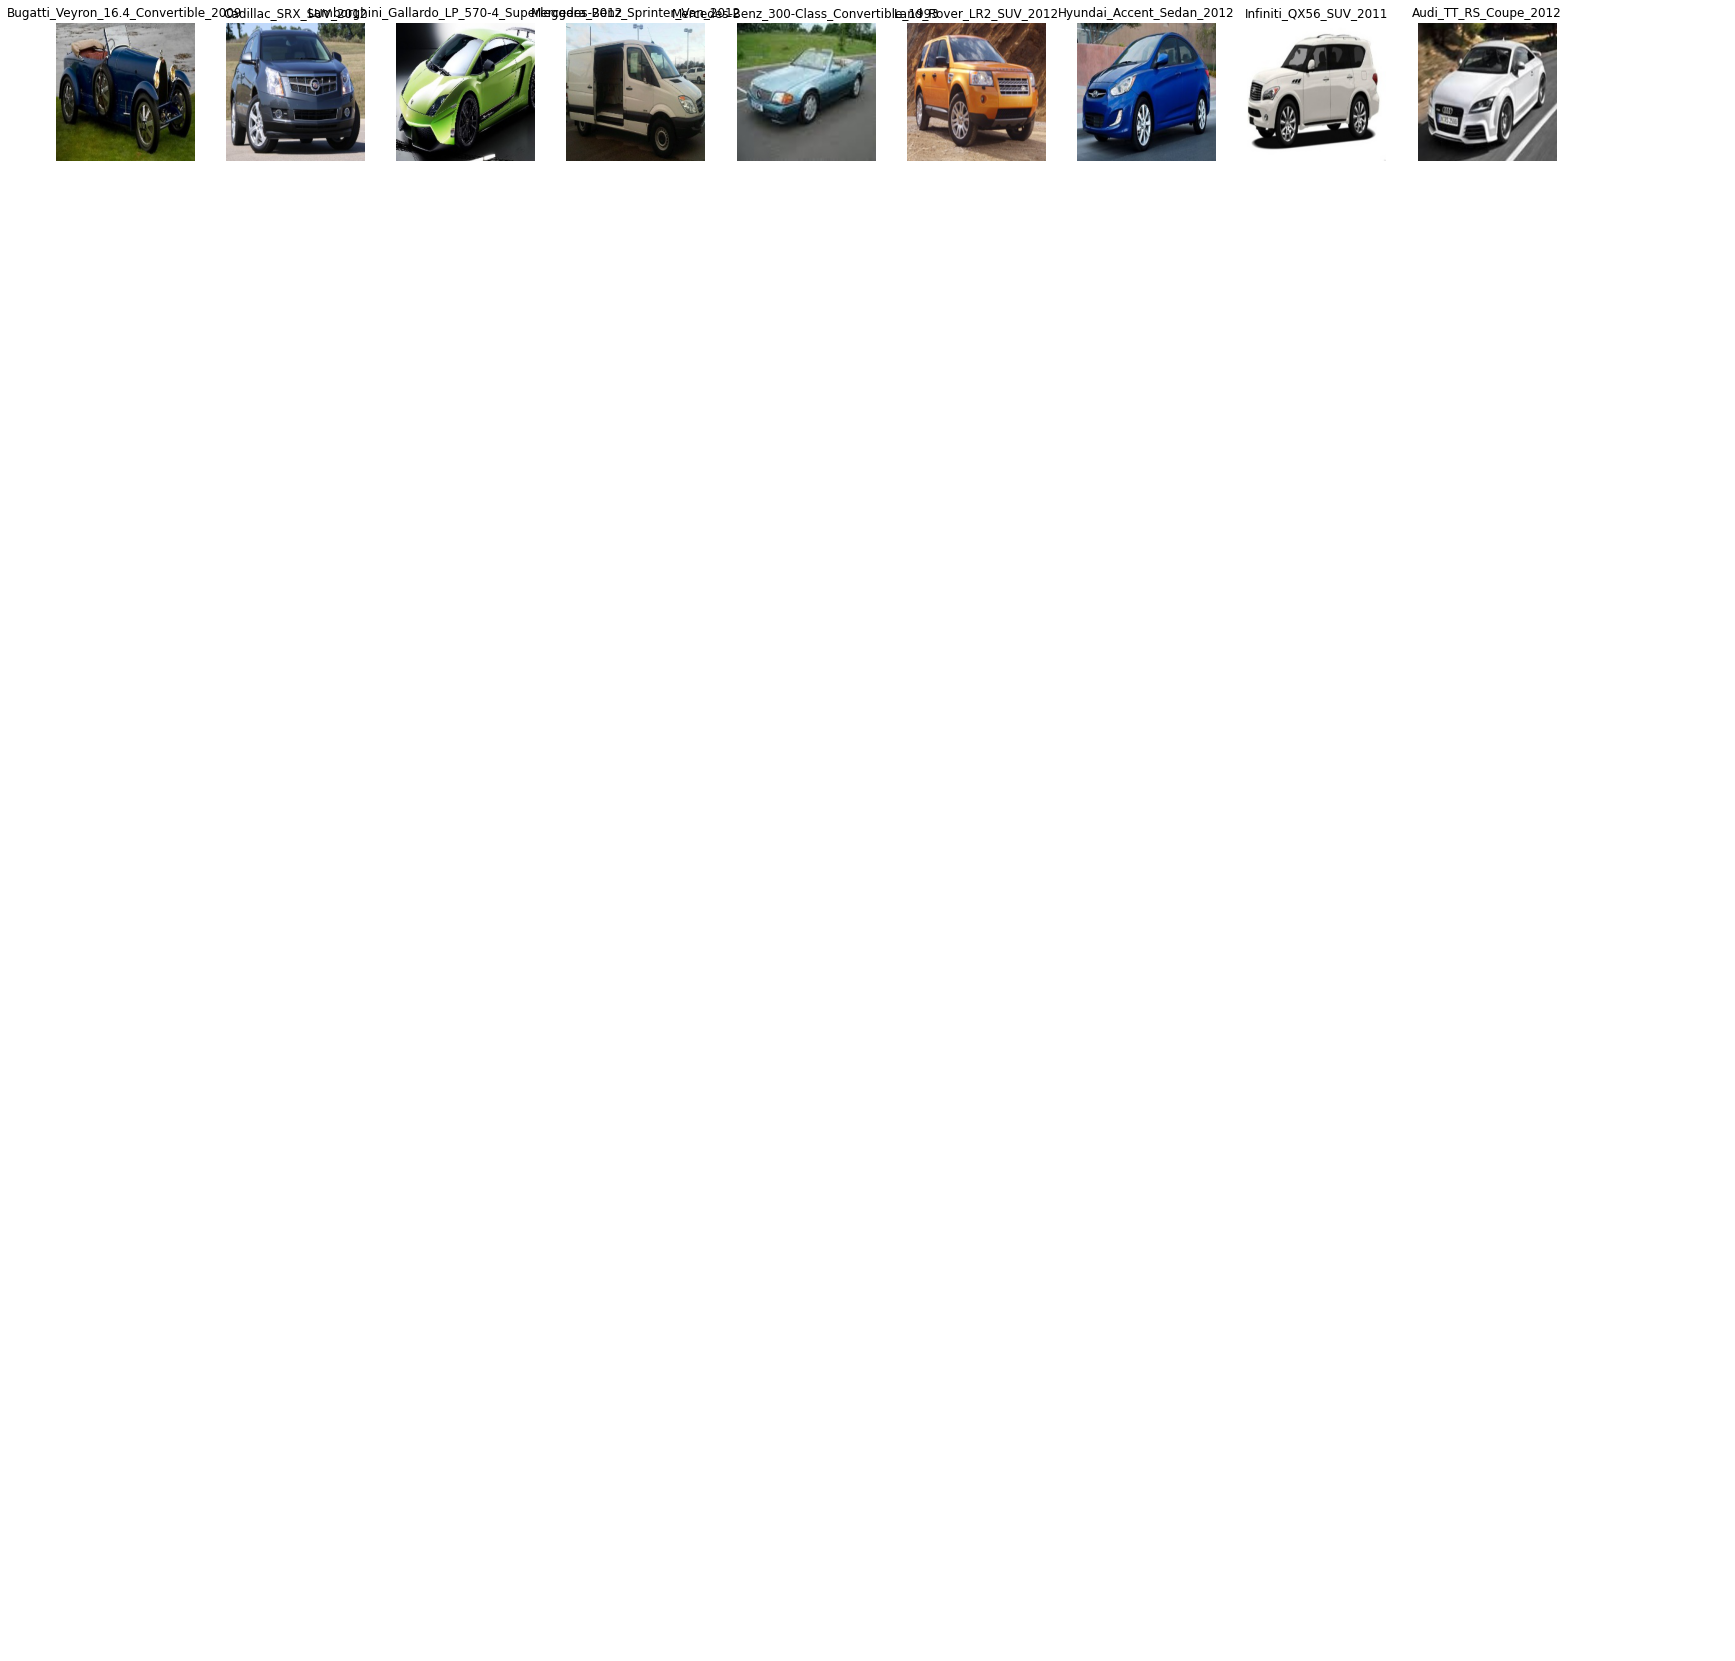

In [56]:
dls.show_batch(nrows=10, ncols=10)

Binary Cross-Entropy
Now we'll create our Learner. We saw in <> that a Learner object contains four main things: the model, a DataLoaders object, an Optimizer, and the loss function to use. We already have our DataLoaders, we can leverage fastai's resnet models (which we'll learn how to create from scratch later), and we know how to create an SGD optimizer. So let's focus on ensuring we have a suitable loss function. To do this, let's use cnn_learner to create a Learner, so we can look at its activations:

We also saw that the model in a Learner is generally an object of a class inheriting from nn.Module, and that we can call it using parentheses and it will return the activations of a model. You should pass it your independent variable, as a mini-batch. We can try it out by grabbing a mini batch from our DataLoader and then passing it to the model:

Think about why activs has this shape—we have a batch size of 64, and we need to calculate the probability of each of 20 categories. Here’s what one of those activations looks like:

We can now train our model. Let's try setting the accuracy threshold to 0.2 for our metric:

Plot the learning rate and try to pick the most optimal learning rate.

In [57]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

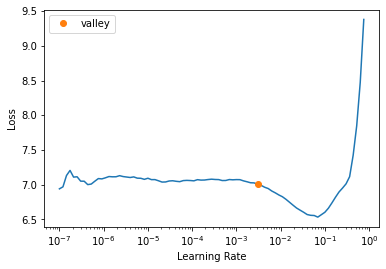

In [58]:
# lr_min,lr_steep = learn.lr_find()
lr_min = learn.lr_find()

lr_min=SuggestedLRs(valley=0.0014454397605732083)


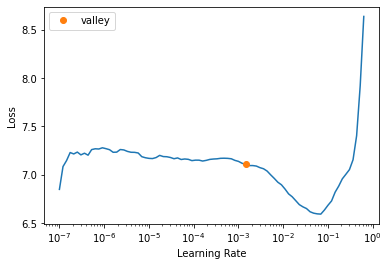

In [59]:
#learn.lr_find()
#learn.recorder.plot(suggestion=True)
lr_min = learn.lr_find()
print(f"lr_min={lr_min}")

As seen in the lr plot. 3e-2 seems to be the correct value for learning rate.

In [60]:
dls.loss_func

FlattenedLoss of CrossEntropyLoss()

In [61]:
learn.fine_tune(20, base_lr=2.5e-3)

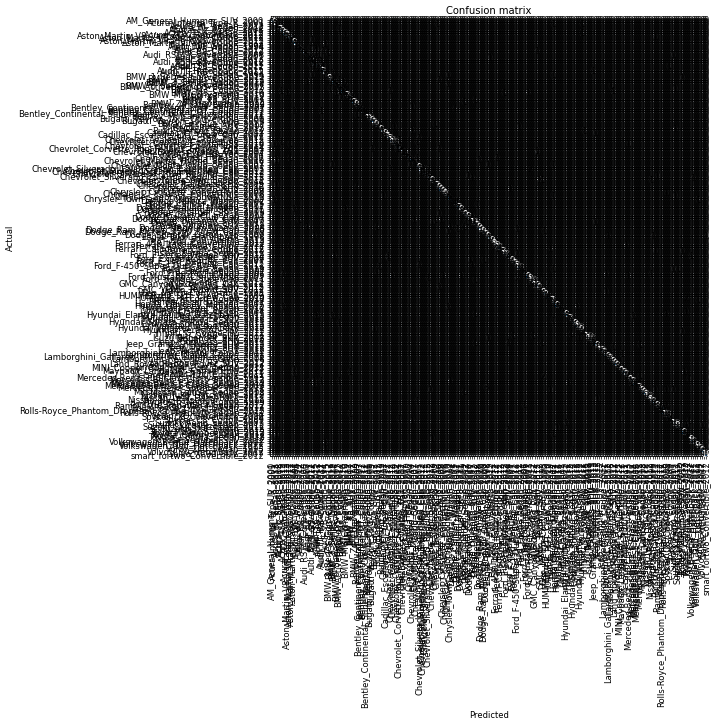

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [63]:
interp.most_confused(min_val=5)

[('Rolls-Royce_Ghost_Sedan_2012', 'Rolls-Royce_Phantom_Sedan_2012', 5)]

This sounds very accurate! But it's important to take a look at our results with Learner.show_results. The left side are the actual (ground truth) coordinates and the right side are our model's predictions:

In [64]:
# create cars model output.
cars_model_output_path = Path('./cars_model_output')
if not os.path.exists(cars_model_output_path):
    cars_model_output_path.mkdir()

In [65]:
#Export the model. You can find this in cars_training_output directory
learn.export(fname=("cars_model.pkl"))

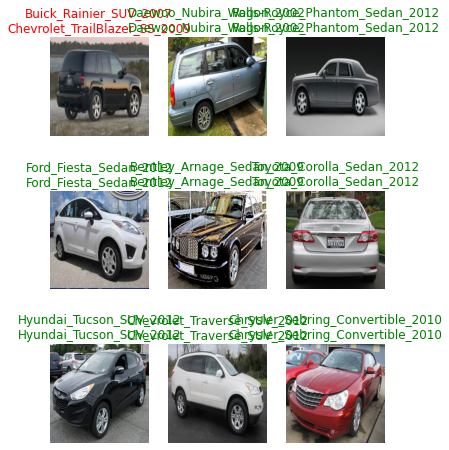

In [66]:
learn.show_results(ds_idx=1, nrows=3, figsize=(6,8))

Plot the confusion matrix.

In [67]:
learn = load_learner('cars_training_output/cars_model.pkl')

Picking a threshold is important. If you pick a threshold that's too low, you'll often be failing to select correctly labeled objects. We can see this by changing our metric, and then calling validate, which returns the validation loss and metrics:

If you pick a threshold that's too high, you'll only be selecting the objects for which your model is very confident:

Predicting on the test set.training_data.csv contains a test file_named in the cars_training_output directory mapped to a class label. 

Example: training_data.csv
file_name = cars_testing_output/00001.jpg		
label = Suzuki_Aerio_Sedan_2007

Load the cars test annotations

In [68]:
cars_testing_output_path = Path('./cars_testing_output')

In [69]:
if os.path.exists(cars_testing_output_path):
  shutil.rmtree(cars_testing_output_path)

if not os.path.exists(cars_testing_output_path):
    cars_testing_output_path.mkdir()

Create a .csv file for test data.


In [70]:
import csv

img_width, img_height = 224, 224


def save_test_data(fnames, labels, bboxes):
  src_folder = (cars_testing_path)
  dst_folder = cars_testing_output_path
  num_samples = len(fnames)
  pb = ProgressBar(total=100, prefix='Save test data', suffix='', decimals=3, length=50, fill='=')
  
  with open('testing_data.csv', 'a', newline='') as file:
    fieldnames = ['file_name', 'label']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(num_samples):
      fname = fnames[i]
      label = labels[i]
      (x1, y1, x2, y2) = bboxes[i]
      src_path = os.path.join(src_folder.as_posix(), fname)
      src_image = cv.imread(src_path)
      height, width = src_image.shape[:2]
      # margins of 16 pixels
      margin = 16
      x1 = max(0, x1 - margin)
      y1 = max(0, y1 - margin)
      x2 = min(x2 + margin, width)
      y2 = min(y2 + margin, height)
      # print("{} -> {}".format(fname, label))
      pb.print_progress_bar((i + 1) * 100 / num_samples)
      dst_path = os.path.join(dst_folder, fname)

      crop_image = src_image[y1:y2, x1:x2]
      dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
      cv.imwrite(dst_path, dst_img)
      #writer.writerow({'file_name': dst_path, 'label': label})
      writer.writerow({'file_name': fname, 'label': label})
    
    #write the training data label.
    with open('testing_data_label.csv', 'a', newline='') as training_label:
      for i in range(num_samples):
        training_label.write(labels[i] + '\n')

def process_test_data():
    print(f"Processing test data {cars_test_annos}.")
    cars_annos = scipy.io.loadmat(cars_test_annos)
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        #labels.append('%04d' % (class_id,))
        #print(f'class_id = {class_id}')
        labels.append(cars_name_list[int(class_id)-1])
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print(np.unique(labels))
    print('The number of different cars is %d' % labels_count)

    save_test_data(fnames, labels, bboxes)

process_test_data()

Processing test data cars_annotations/devkit/cars_test_annos_withlabels.mat.
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196]
['AM_General_Hummer_SUV_2000' 'Acura_Integra_Type_R_2001' 'Acura_RL_Sedan_2012' 'Acura_TL_Sedan_2012' 'Acura_TL_Type-S_2008' 'Acura_TS

In [71]:
print("Total number of training files = {}.".format(len([iq for iq in os.scandir('cars_training/cars_train')])))
print("Total number of testing files = {}.".format(len([iq for iq in os.scandir('cars_testing/cars_test')])))

Total number of training files = 8144.
Total number of testing files = 8041.


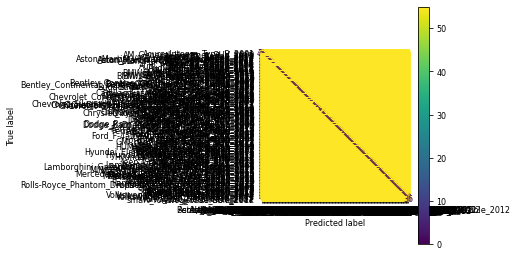

<Figure size 86400x86400 with 0 Axes>

classification_report =                                                         precision    recall  f1-score   support

                            AM_General_Hummer_SUV_2000       0.93      0.93      0.93        44
                             Acura_Integra_Type_R_2001       0.81      0.80      0.80        44
                                   Acura_RL_Sedan_2012       0.51      0.69      0.59        32
                                   Acura_TL_Sedan_2012       0.79      0.70      0.74        43
                                  Acura_TL_Type-S_2008       0.94      0.71      0.81        42
                                  Acura_TSX_Sedan_2012       0.74      0.72      0.73        40
                              Acura_ZDX_Hatchback_2012       0.76      0.67      0.71        39
              Aston_Martin_V8_Vantage_Convertible_2012       0.64      0.47      0.54        45
                    Aston_Martin_V8_Vantage_Coupe_2012       0.55      0.63      0.59        41
               

In [88]:
from fastai.learner import load_learner
from collections import defaultdict
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import json
#from fastai.vision.data import ImageDataLoaders

#learn = load_learner('cars_model.pkl', test= 
#                     ImageDataLoaders.from_csv('./','labels.csv',
#                                        folder=cars_testing_output_path))
#preds,y = learn.TTA(ds_type=DatasetType.Test)
fieldnames = ['file_name', 'label']
invalid_pred = defaultdict(list)
invalid_pred_count=0
y_true = []
y_pred = []

with open('./testing_data.csv') as test:
    reader = csv.DictReader(test, fieldnames=fieldnames)
    for index, row in enumerate(reader):
      try:
        pred = learn.predict((cars_testing_output_path/row['file_name']))
        y_true.append(row['label'])
        y_pred.append(pred[0])
        if pred[0] != row['label']:
          invalid_pred[row['label']].append("File: {}, \
          actual_pred={}".format(row['file_name'], pred[0]))
          invalid_pred_count+=1
        index +=1
      except:
        pass

display = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.figure(figsize=(1200,1200))
plt.show(display.plot)
print(classification_report(y_true, y_pred))
print("invalid_pred_count= {}".format(invalid_pred_count))
print(json.dumps(invalid_pred, indent=4, sort_keys=True))


In [73]:
print("invalid_pred count = {}".format(len(invalid_pred)))

invalid_pred count = 196
